# Assignment 3 - Project Group 5

Aleksandra Siderova - s2249987

Plamen Bozov - s2319217

Lena Huster - s2239531

Danielle Ehizibue - s2028484

Judith Bravo de Medina Arribas - s2368528

Boris Belchev - s2388952



*20 October 2021*

## 1. Motivation & Goal
Booters have been under circulation for quite some time, used to perform DDoS attacks to bring down websites. This service is a non-legal way to use IP stressers, which looks for keeping the identity of the attacker hidden through the use of proxy servers and masking the IP of the person performing the attack. 

The aim of this research is to analyze the TWBooter database leaked by Brian Kerbs back in 2013, searching and understanding the different parts of such information in order to have a more complete overview of how a booter service may work. Furthermore, by looking at the number of attacks or users of the booters webpage, a better understanding of how big the problem is and an average of people performing attacks or being victims of such performances can be analyzed and taken into account for further booter research. 

Looking into the Dutch position about the use of booters, the position is towards declaring this services ilegal, since for the police, the use or possession of booter services is illegal and punishable, especially if it is used to disrupt someone's computer without their consent. This motivates the reason behind the study, in order to understand past events that could be useful for the ducth authorities to look into present use of booters, the average number of people using this services and attacks to be performed. Even though the information is from 2013, some of this could be applied for today's position against booters services. Moreover, with this research the reader can gain deeper knowledge into the function and scope of booter websites and booter shells. With finding out more about the way they work, it makes it easier to understand which steps would have to be taken in order to prevent these attacks and to ensure more safety online. 


## 2. Methodology & Results

### 2.1. Methodology
To make the analysis of the leaked database we used Excel and Pandas as tools to extract information.
First of all, to calculate the total number of attack records, we took the count of the id’s but beforehand we removed the duplicates. Afterwards, for the unique users, we used the “victim” column. We applied the same approach: copy the column and remove duplicates. The difference here was that we cut every entry in this column from “http://” and then we removed the duplicates because we found out there are for example entries in the form: “http://92.31.245.3” and “92.31.245.3”. 
To find the “top 10 IP/domain” we used the unique users' column which we did previously and created a formula that uses this column to count the occurrences of every IP/domain in the original “victim” column and then we ordered them by largest to smallest.

Furthermore, to find out about the longest duration of an attack, we ordered the “duration” column from largest to smallest.
For the attack type, we applied the same steps as for “top 10 IP/domain” without of course cutting anything from the entries. 
Moreover, to find the owner id which performed most of the attacks we used the “client_attacker” column applying the same approach as the “top 10 IP/domains”  and for the attack type.
To find out how many attacks krebsonsecurity.com suffered we counted on the criteria of victim domain and also IP address which should be 72.52.7.144, we checked how many times they occur in the records. To analyse the ports that were used in the attack, we counted the number of times a port occurs in the column “port_service_time”. At last, we calculated the number of attacked .gov domains by using the “victim” column and checking which domains include “.gov”. Then, we counted the unique values of all the .gov domains to get our result. 

#### *2.1.1. Libraries that we used to analyse the data*

In [387]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

### 2.2. Results

Our investigation of the leaked database of the user base of the TWBooter led us to find the following information, which we divided into three sections based on the type of data we acquired.

### *2.2.1. Types of attacks*

First, we decided to look into the types of attacks performed by the attackers, starting from the total number of attack records, which we found to be **48773**. 

In [390]:
#Reading the Excel file (table_attack_twbooter.xls)
table_attack = pd.read_excel("table_attack_twbooter.xlsx")
table_attack.head()

,id,processid,victim,port_service`_type,type,duration,time,stopped,client_attacker,server_used_in_th_attack
0,1,5672,91.214.20.52,80,ESSYN,33,1358989954,1,1,94.102.49.76
1,2,29065,91.214.20.52,80,UDP,1783,1358990329,1,1,93.174.93.30
2,3,23005,78.31.8.124,80,ESSYN,393,1358991360,0,1,89.248.172.97
3,4,29411,199.204.44.188,80,ESSYN,60,1358995416,0,4,93.174.93.30
4,5,19298,http://chrome-mods.com,80,RUDY,50000,1358995471,1,3,72.9.144.80


In [429]:
#The total number of attack records
print((len(table_attack)))

48773


The longest attack is listed as lasting **500000**, but since we do not have precise information about the measurement used for the time, we can only assume that the number is in milliseconds, which converted is about **8.20 minutes**, because otherwise if the measurement is in seconds, the longest attack would have lasted approximately **138 hours**, which we estimated to be far too long.

In [394]:
longest_duration = table_attack['duration'].max()
print('Longest atttack duration: ' + str(longest_duration))

print('In miliseconds: ' + str(pd.to_timedelta(longest_duration, unit='ms')))
print('In seconds: ' + str(pd.to_timedelta(longest_duration, unit='s')))

Longest atttack duration: 500000
In miliseconds: 0 days 00:08:20
In seconds: 5 days 18:53:20


To conclude this section, we examined the three most frequently used attack types. We discovered that those are attacks using **ESSYN, UDP and RUDY** (Figure 1).
First, we decided to look into the ESSYN attacks. We found that the most likely type of attack to be performed in this way is an ESSYN flood, which is a variation of the SYN flood attack. The attack is performed by many source IPs that each try to open a connection with the victim’s IP, with the intent of overloading the victim’s firewall table, which would cause actual users’ attempts to connect to the IP to fail when the table is filled.

Next, the attack using UDP was mainly performed on port 80, which is the port number for HTTP. The most likely type of attack here is a UDP flood. 
The aim of such an attack is to use all the bandwidth so that legitimate visitors of the site cannot access it. It does so by sending many requests which the victim server has to handle until it consumes all the bandwidth.

Finally, RUDY is a tool used to perform DDoS attacks by making use of a website’s form submission. It does so by submitting very long HTTP POST requests and sending them as very small packets at random intervals, thus using up the victim server’s resources. This type of attack can continue for a long time since it can be mistaken for a legitimate user with a slow connection sending requests.




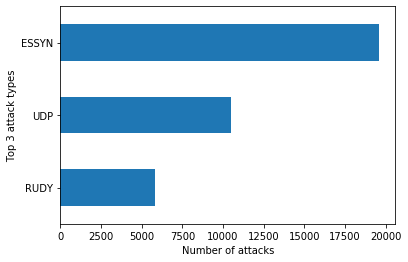

In [397]:
top3_attack_type = table_attack['type'].value_counts().head(3).sort_values()
fig = plt.figure()
ax = plt.subplot2grid((1,1), (0,0))
top3_attack_type.plot(kind='barh')
ax.set_ylabel("Top 3 attack types")
ax.set_xlabel("Number of attacks")

fig.show()

*Figure 1 . Top 3 attack types*

### *2.2.2. The Attackers*

Next, we looked into the attackers. The number of unique users we discovered is **9518**, while the owner id which is the “client_attacker” column which performed the most attack is **272** with **2307** attacks performed.

In [253]:
#creating a copy of the df table_attack
table_attack_copy = table_attack.copy()
#Removing domain "http://" in column victim
table_attack_copy['victim'] = table_attack_copy['victim'].str.replace('http://', '')

In [443]:
#number of unique users:
len(table_attack_copy.drop_duplicates(subset = ["victim"]))

9518

In [401]:
#Owner Id that performed most of the attacks
table_attack['client_attacker'].value_counts().head(3)

272    2307
197    2028
111    1965
Name: client_attacker, dtype: int64

Then we looked for the server most frequently used in attacks and we found that to be **89.248.172.106**, used **4976** times. It is also based in Amsterdam and uses IP Volume as an ISP.

In [404]:
#Most frequently used server
table_attack['server_used_in_th_attack'].value_counts().head(1)

89248172106    4976
Name: server_used_in_th_attack, dtype: int64

### *2.2.2. The Victims*

For the victims, we investigated the top 10 IP addresses and the top 10 domains. For the IP addresses, we found the following:

- 87.106.136.156 - Germany
- 212.7.214.197 - Poland
- 72.9.144.6 - USA
- 70.39.68.226 - USA
- 176.31.90.154 - France
- 186.202.153.45 - Brazil
- 69.162.77.11 - USA
- 198.1.122.66 - USA
- 100.42.216.59 - USA
- 189.38.59.130 - Brazil

The most attacked IP address is located in Germany, but the USA appears the most often in the top ten list.
Moreover, the following domains were attacked the most:

- http://www.relog.co.il - Israel
- http://rewards.yourpshome.net - unknown, possibly the UK based on similar URLs that still exist
- http://pshomecentral.net - USA
- http://ajnabi.vchats.info/ - unknown
- http://ajnabi.pkfun.net/ - unknown
- http://www.nordicmakten.com - France
- http://www.nordicmafia.net - USA
- http://www.yourpshome.net - UK
- http://www.violvocal.com - unknown
- http://lapdonline.org - USA

The most attacked domain this time is in Israel, but the USA still appears the most often in the top 10 list.

In [438]:
#The top 10 IP addresses & domain names
top10_victim_IP_and_domain = table_attack_copy['victim'].value_counts().head(41)
print(top10_victim_IP_and_domain)

87.106.136.156             1106
212.7.214.197               799
www.relog.co.il             635
rewards.yourpshome.net      445
pshomecentral.net           383
ajnabi.vchats.info/         367
72.9.144.6                  304
70.39.68.226                285
176.31.90.154               280
186.202.153.45              244
69.162.77.11                225
198.1.122.66                208
rewards.yourpshome.net/     190
100.42.216.59               189
ajnabi.pkfun.net/           184
www.nordicmakten.com        178
189.38.59.130               176
85.114.128.90               176
187.45.182.231              127
209.205.72.160              123
50.116.92.237               121
77.111.199.43               119
2.51.2.20                   118
74.91.116.80                108
www.nordicmafia.net         107
192.211.59.50               104
82.80.17.115                101
www.yourpshome.net          100
violvocal.com               100
50.116.92.236                98
100.42.216.60                95
109.163.

Finally, we decided to check how many times krebsonsecurity.com, a website providing news about security, was attacked - **ten times**.


In [412]:
attacks_on_krebsonsecurity = table_attack[table_attack['victim'].isin(['http://krebsonsecurity.com', '72.52.7.144', 'http://72.52.7.144'])]
attacks_on_krebsonsecurity

#Total number of attacks Krebsonsecurity.com suffered from:
len(attacks_on_krebsonsecurity)

10

### *Other statistics*
We also chose to measure what the most used ports are for the attacks because it is important to know which ones are the “Favourite” of the attackers and which they find most vulnerable. In this attack **port 80** was the most attacked one and then **6005** and **6000** (Figure 2). 


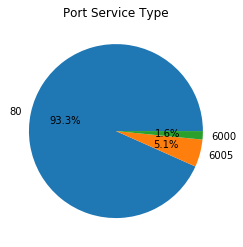

In [410]:
#Top 3 port service types
top3_port_type = table_attack['port_service`_type'].value_counts().head(3)
top3_port_type
ax = plt.subplot2grid((1,1), (0,0))
plot = top3_port_type.plot(kind='pie', y=ax, title="Port Service Type",autopct='%1.1f%%', startangle=0)
ax.set_ylabel("")
fig.show()

*Figure 2 . Port service types that were mostly used in the attack.*

In addition, the total number of unique .gov domains that were attacked was **167**. As apparent, most of the attacks were focused on **Indian .gov** domains. 

In [427]:
attacked_gov_domains = table_attack[table_attack['victim'].str.contains('\\.gov', na= False)]
gov_domains_attacked = attacked_gov_domains['victim'].value_counts().sort_values()
#The total number of .gov domains that were attacked:
gov_domains_attacked.sum()

167

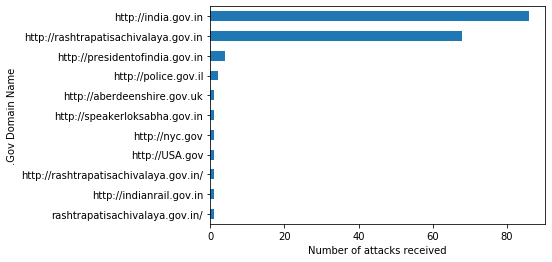

In [428]:
fig = plt.figure()
ax = plt.subplot2grid((1,1), (0,0))
gov_domains_attacked.plot(kind='barh')
ax.set_ylabel(".Gov Domain Name")
ax.set_xlabel("Number of attacks received")

fig.show()

*Figure 3 . Gov Domains that were attacked most.*

## 3. Conclusion
Nowadays Booters are still part of the internet and can be said to be an actively growing business. Just by typing Booter in Google, a person can already find at least 10 links on the first page with “companies” providing this service. The attack we investigated above is a clear example of what power such an attack can have. From what we have seen there are three types of attacks that try to overwhelm the victims. The attack was not intended for only one domain. 
Also, the investigation showed many attackers, but there was one that performed most of the attacks, so it can be considered that the owner of that IP might be the main attacker and also there is the chance of that owner to also be involved in the other attacks that have happened.

A lot of times those attacks can come from the people inside the organisations that want to harm them, this means sometimes to find the actual attackers or the people that caused it, it is worthwhile to look at IP addresses close to that organisation. Also sometimes it might look like an attack from far away. On the other hand, if a mistake is seen like a person has travelled 5000 kilometres in 10 minutes, then it is really easy to see who is the actual suspect of the attack. 

The first idea of a booter was actually to create a tool that can test a system’s bandwidth and resources of how much pressure it can handle. However, over time it has been made as a way to perform attacks so it has become a powerful tool. 
The people that use booters, are mostly people with a lack of technical knowledge or don’t have the systems needed to perform such an attack. In that case, it is easy for them to just hire somebody to perform such an attack. As the technical knowledge of people is involved every day, this means that nowadays every person with some bad intentions can directly perform a strong attack for only a couple of dollars. Because of that Booters need to be seriously considered by the authorities and need to be taken serious measures against them, so the intensity of such attacks can decline significantly. 

## 4. References
What is a DDoS booter/IP stresser | DDoS attacks tools. (n.d.). Cloudflare. Retrieved October 16, 2021, from https://www.cloudflare.com/en-gb/learning/ddos/ddos-attack-tools/ddos-booter-ip-stresser/

DDoS = cybercrime = no kidding. (n.d.). Politie. Retrieved October 16, 2021, from https://www.politie.nl/algemeen/ddos.html?gclid=CjwKCAjw8KmLBhB8EiwAQbqNoI0X0Vtxsd1TpPk3motyiRIbu6HMtH5IsvuhUCztI40YXEwRRxE1LBoCeJQQAvD_BwE&sid=698c8dde-4c45-48c4-a0f4-1e8917584402

Guide to DDoS Attacks, November 2017. MS-ISAC. Retrieved October 19, 2021 from
https://www.cisecurity.org/wp-content/uploads/2017/03/Guide-to-DDoS-Attacks-November-2017.pdf

R U Dead Yet? (R.U.D.Y.) attack. Cloudflare. Retrieved October 19, 2021, from
https://www.cloudflare.com/learning/ddos/ddos-attack-tools/r-u-dead-yet-rudy/
